# 기초 통계

## 중심극한정리
- Central Limit Theorem
- 정규분포가 아닌 분포라도 선택된 표본들의 평균을 모아 다시 분포를 그리면 정규분포가 된다.
- 단 최소 표본의 크기가 30이상이어야 함.
- CLT에 따르면 sampling distribution은 정규분포 따름

## 가설검정 오류
- 1종 오류: 귀무가설이 사실인데, 귀무가설을 기각하는 경
- 2종 오류: 귀무가설이 거짓인데, 귀무가설을 채택하는 경우

## $\alpha$ = 신뢰수준
- 귀무가설이 참일 때, 이를 참이라고 판단하는 확률 = $ 1 - \alpha$
- 의사결정기준은 1종 오류를 범할 확률 (유의수준 $\alpha$)

## p-value
- $\alpha$ = 95% 일때
  + $p > 0.05$ : 귀무가설 채택
  + 그 외: 귀무가설 기각, 대립가설 채택

# t-검정의 종류
- One-Sample t-test (일표본 단일검정)
- Paired t-test (대응표본)
- Independent t-test (두 평균의 비교, 독립검정)

# t-검정 개괄
- 가정 만족 확인 : 정규성, 등분산성 검정

> 정규성의 가설 검정
> - 귀무가설 : 데이터가 정규분포를 따른다.
> - 대립가설 : 데이터가 정규분포를 이루고 있지 않다.
> - Shapiro-wilk tests로 확인
> - 만족 안하면 비모수 검정함 : Mann-Whiteney test

> 등분산성 가설 검정
> - 귀무가설: 두 그룹의 분산 같다.
> - 대립가설: 두 그룹의 분산 다르다.
> - 일반적으로 levene 검정으로 확인
> - 만족 안하면 비모수 검정: welch test


이걸 다 만족하면, t-검정 가설 검정을 한다.

> 단일표본 t-검정
> - 귀무가설: 모평균과 표본평균 같다.
> - 대립가설 : 모푱균과 표본평균 같지 않다.

> 독립표본 t-검정
> - 귀무가설: 그룹 1과 그룹 2의 평균 같다.
> - 대립가설: 그룹 1과 그룹 2의 평균 같지 않다.
> - 가정: 독릷성, 정규성, 등분산성 만족해야함


> 대응표본 t-검정
> - 귀무가설: 실험전후 평균 차이 0이다.
> - 대립가설: 실험 전후 평균 차이는 0이 아니다.




- p-value가 0.05보다 크면 귀무가설 채택

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from statistics import NormalDist
from scipy.stats import ttest_1samp
from scipy import stats

# z-검정, t-검정
- 평균 차이 검정

## z검정
- 모수의 분산, 표준편차 등을 알고 있어야 함

In [2]:
import pandas as pd
df = pd.DataFrame({"grades" : [50, 60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]})
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [3]:
# 모수의 표준편차는 9.5로 알려져있다고 하자

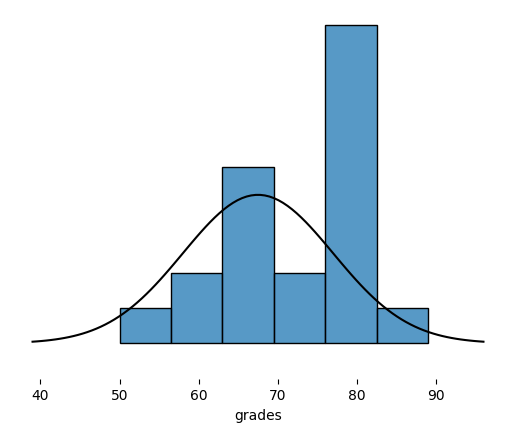

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5       # 모수의 평균
sigma = 9.5     # 모수의 편차
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

### 가설수립
- 귀무가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 없다!
- 대립가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 있다.

### z - score 구하기

In [6]:
import math
sample_mean = df['grades'].mean()
sd_true = 9.5
mu_null = 67.5
N = len(df['grades'])
sem_true = sd_true / math.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score # 통계량


np.float64(2.259605535157681)

### p-value

In [7]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value


0.023845743764939753

## t-검정의 종류
- One-Sample t-test (일표본 단일검정)
- Paired t-test (대응표본)
- Independent t-test (두 평균의 비교, 독립검정)

# One-Sample t-test
- 일표본 단일검정
- z-검정과의 차이점
  + 모집단의 표준편차를 모름
  + 모집단의 평균을 알고 있음
  + 자유도 : N-1 (z-검정은 N)
- 모집단의 평균 : 사회적인 통념, 알려진 사실


- 가설설정
  + 귀무가설 : 모집단의 평균과 표본의 평균은 같다.
    - 오리온 초코칩의 무게중량 45g이 맞을 것이야
  + 대립가설 : 모집단의 평균과 표본의 평균은 다르다.
    - 오리온 초코칩의 무게중량 45g이 아니다!

In [8]:

N = len(df['grades'])
degfree = N-1
sample_mean = df['grades'].mean()
print('Sample mean:', sample_mean)
print('Degrees of freedom:', degfree)

Sample mean: 72.3
Degrees of freedom: 19


## t-test

In [11]:
from scipy.stats import ttest_1samp

# ttest_1samp : one sample test
t, p = ttest_1samp(a = df['grades'], popmean = 71) # popmean: 모집단 평균
t, p

(np.float64(0.6106514014810425), np.float64(0.5486662606700853))

In [12]:
# t 값: 표본 평균이 주어진 모집단 평균과 얼마나 차이가 나는지를 나타내는 t-통계량입니다.
# p 값: 귀무가설 하에서 표본 평균이 주어진 모집단 평균과 같을 확률입니다.

## 신뢰구간 추정

In [13]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = df['grades'].mean()
sample_standard_error = df['grades'].sem()

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(np.float64(67.84421513791415), np.float64(76.75578486208585))

In [14]:
ttest_1samp(a = df['grades'], popmean = 71).confidence_interval()

ConfidenceInterval(low=np.float64(67.84421513791415), high=np.float64(76.75578486208585))

## 문제
- 주어진 데이터(data/trees.csv)에는 블랙 체리나무 31그루의 둘레와 높이, 부피가 저장되어 있다. 체리나무의 평균 높이는 75로 알려져 있다. 이 높이에 대해서 이 표본의 평균이 모평균과 일치하는지 단일표본 t-검정(One Sample t-test)을 통해 답하고자 한다. 가설은 아래와 같다.

- 가설검정
  + 귀무가설 : 체리나무의 모평균(평균 75)과 표본평균(평균 76)의 차이는 같다.
  + 대립가설 : 체리나무의 모평균(평균 75)과 표본평균(평균 66)의 차이는 같지 않다.

- 데이터의 변수
  + Girth : 둘레
  + Height : 높이
  + Volume : 부피
- 단, 데이터의 각 변수들은 정규 분포를 만족한다고 가정한다.

- 문제 1 : 표본평균 X를 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 2 : 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3 : 위의 통계량에 대한 p-값을 구하고(반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [19]:
df=pd.read_csv('c:/Archiving/IMDGB/step03_statistics/dataset/trees.csv')
df.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [20]:
# 문제 1
result = df['Height'].mean()
result

np.float64(76.0)

In [21]:
# 문제2
from scipy import stats

t, p = stats.ttest_1samp(data['Height'], popmean = 75)
t, p

(np.float64(0.8738116490580545), np.float64(0.38916223357338076))

In [22]:
# 문제3

if p >= 0.05:
  print("귀무가설 채택")
else:
  print("귀무가설 기각 ==> 대립가설 채택")

귀무가설 채택


# 독립표본 T- test
- 주어진 데이터(data/toothgrowth.csv)에는 기니피그 60마리의 치아 길이, 투여한 비타민 C 종류, 투여량이 저장되어 있다. 오렌지주스를 투여받은 기니피그의 치아 길이 평균이 아스코르브산을 투여받은 기니피그의 치아 길이 평균과 일치하는지 t-검정(Two Sample t-test)를 통해 답하고자 한다. 가설은 아래와 같다.
- 가설검정
  + 귀무가설 : 오렌지주스 투여 기니피그 치아 길이 평균과 아스코르브산 투여 받은 기니피그의 치아길이 평균의 차이는 0이다.
  + 대립가설 : 오렌지주스 투여 기니피그 치아 길이 평균과 아스코르브산 투여 받은 기니피그의 치아길이 평균의 차이는 0이 아니다. (둘 평균 다르다.)
- 데이터의 변수
  + len : 치아의 길이
  + supp : 투여한 약제(VC: 아스코르브산, OJ: 오렌지주스)
  + does : 투여량
단, 데이터의 각 변수들은 정규분포를 만족하며, 두 그룹은 등분산을 띤다.

- 문제 1: 표본평균 를 구하시오.
- 문제 2: 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3: 위의 통계량에 대한 p-값을 구하고 (반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.


In [23]:
df2 = pd.read_csv("c:/Archiving/IMDGB/step03_statistics/dataset/toothgrowth.csv")
df2.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


## 가설검정
- 독립표본 T-검정은 정규성 검정 뿐만 아니라, 두 그룹이 등분산성을 띠는지 확인하는 작업 필요
- Levene 검정을 사용한 등분산성 검정이 선행되어야 함
- 가설설정
  + 귀무가설: 두 그룹의 분산 같다
  + 대립가설: 두 그룹의 분산은 같지 않다.

In [24]:
df2.loc[df2['supp']=='OJ']

,len,supp,dose
30,15.2,OJ,0.5
31,21.5,OJ,0.5
32,17.6,OJ,0.5
33,9.7,OJ,0.5
34,14.5,OJ,0.5
35,10.0,OJ,0.5
36,8.2,OJ,0.5
37,9.4,OJ,0.5
38,16.5,OJ,0.5
39,9.7,OJ,0.5


In [25]:
df2.loc[df2['supp']=='OJ','len']

30    15.2
31    21.5
32    17.6
33     9.7
34    14.5
35    10.0
36     8.2
37     9.4
38    16.5
39     9.7
40    19.7
41    23.3
42    23.6
43    26.4
44    20.0
45    25.2
46    25.8
47    21.2
48    14.5
49    27.3
50    25.5
51    26.4
52    22.4
53    24.5
54    24.8
55    30.9
56    26.4
57    27.3
58    29.4
59    23.0
Name: len, dtype: float64

## 등분산성 검정
- levene 검정

In [27]:
from scipy import stats
stats.levene( df2.loc[df2['supp']=='OJ', 'len'] , df2.loc[df2['supp']=='VC', 'len'] )

LeveneResult(statistic=np.float64(1.2135720656945064), pvalue=np.float64(0.2751764616144052))

In [28]:
# pvalue=np.float64(0.2751764616144052) : 귀무가설 채택 -> 이제 t-test 할 수 있음
# 보험 장기 거래가 되는 요인 보기 

In [29]:
# 문제 1
oj_mean = df2.loc[df2['supp']=='OJ', 'len'].mean()
round(oj_mean,2)

np.float64(20.66)

In [30]:
vc_mean = df2.loc[df2['supp']=='VC', 'len'].mean()
round(vc_mean,2)

np.float64(16.96)

In [31]:
# np.float64(20.66) , np.float64(16.96) -> 두 집단 평균 차이가 남

In [33]:
# 문제 2
from scipy import stats
t, p = stats.ttest_ind(df2.loc[df2['supp']=='OJ', 'len'], 
                       df2.loc[df2['supp']=='VC', 'len'], 
                       equal_var=True) # equal_var = True, when 등분산성 만족할 때
t, p

(np.float64(1.91526826869527), np.float64(0.06039337122412848))

In [34]:
# p = np.float64(0.06039337122412848) : 0.05 보다 크다 -> 귀무가설 채택 

In [35]:
# 문제 3
round(p,4)

np.float64(0.0604)

In [36]:
if p>= 0.05:
  print("귀무가설 채택")
else:
  print("귀무가설 기각 ==> 대립가설 채택")

귀무가설 채택


# 쌍체표본 t-test

- 주어진 데이터(data/insectsprays.csv)에는 여러 지역에서 스프레이를 뿌리기 전에 측정한 곤충의 수와 스프레이를 뿌린 다음의 곤충의 수가 저장되어 있다. 해당 스프레이가 구제 효과가 있는지(즉, 스프레이를 뿌린 뒤 곤충의 수가 감소했는지) 쌍체표본 t-검정(Paired t-test)을 통해 답하고자 한다.
- 가설검정 가설검정 만들기
  + 귀무가설 : 스프레이 뿌리기 전 곤충 수의 평균과 뿌린 후의 평균의 차가 0이다.
  + 대립가설 : 스프레이 뿌리기 전 곤충 수의 평균과 뿌린 후의 평균의 차가 0이 아니다.

- 데이터의 변수
  + before_spr : 살충제 뿌리기 전 곤충의 수
  + after_spr : 살충제 뿌린 뒤 곤충의 수
- 단, 는 정규분포를 만족한다.

- 문제 1: 표본평균 의 표본 평균을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 2: 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3: 위의 통계량에 대한 p-값을 구하고 (반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [37]:
df3 = pd.read_csv("c:/Archiving/IMDGB/step03_statistics/dataset/insectsprays.csv")
df3.head()

,before_spr,after_spr
0,10,0
1,7,1
2,20,7
3,14,2
4,14,3


In [40]:
# 문제 1
diff = df3['before_spr'] - df3['after_spr']
result3 = round(diff.mean(),2)
result3

np.float64(12.0)

In [41]:
# 문제 2
from scipy import stats
t, p = stats.ttest_rel(df3['before_spr'], df3['after_spr'])
print(round(t, 2),round(p ,2))

14.89 0.0


In [42]:
# 문제 3
print(round(p,2))

if p>= 0.05:
  print("귀무가설 채택")
else:
  print("귀무가설 기각 ==> 대립가설 채택")

0.0
귀무가설 기각 ==> 대립가설 채택


# 시각화, 독립성검정

- 그러려면 value_counts 찍어서 데이터 분포를 보자
- 보면... 독립성검정 시행할 수 있는 변수는 총 3개인것을 확인 가능.
- 왜냐, 그룹화가 2개로만 된거면 할 수 있으니까.


- 시나리오
  + 성별에 따라서 팁의 액수 평균차이가 존재할 까?
  + 흡연여부에 따라서 팁의 액수 평균차이가 존재할까?
  + 시간대에 따라서 팁의 액수 평균 차이가 존재할까?

- 히스토그램
  + 정규분포 따르는지 아닌지 알아야함.
  + 데이터가 연속형일 때, 숫자일 때 그래프 그려야 함
  + tip을 그릴 때... 그룹 단위로 정규분포를 따르는지 아닌지 체크 해야함 -> 그래프 쌍으로 그려야함. 그룹별로

In [43]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")
tips.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

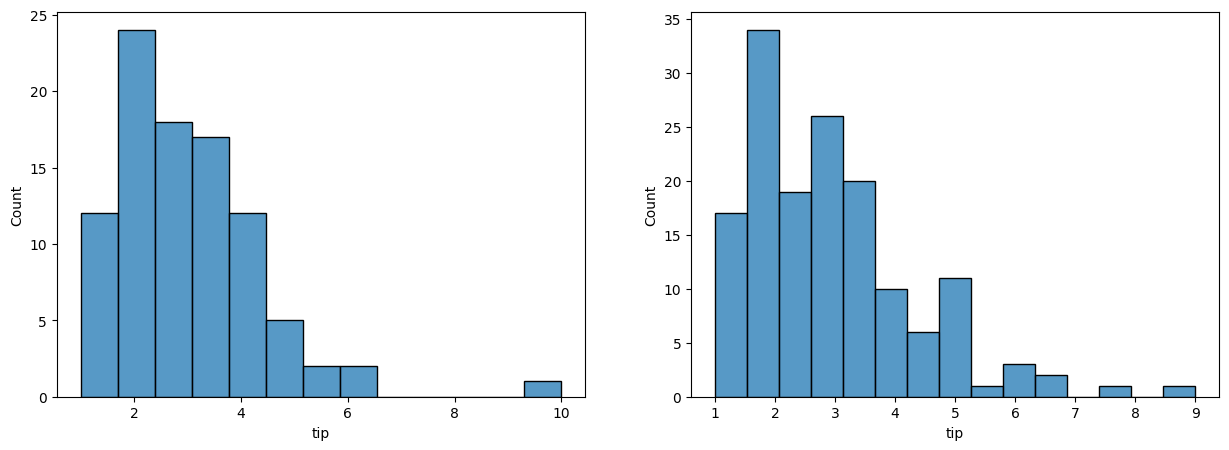

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분리
smoker_yes=tips.loc[tips['smoker']=='Yes',:]
smoker_no=tips.loc[tips['smoker']=='No',:]


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

sns.histplot(smoker_yes['tip'], ax=ax[0])
sns.histplot(smoker_no['tip'], ax=ax[1])


plt.show()

In [46]:
# 위에거는 정규분포 안따르는 것으로 보이지만, 데이터 개수가 30개가 넘으니까 정규분포 만족한다고 생각하고 갈거임. by 중심극한정리 

## Shapiro Wilk 검정
- sample이 30개 미만이라는 가정하에, 정규성 검정해보자

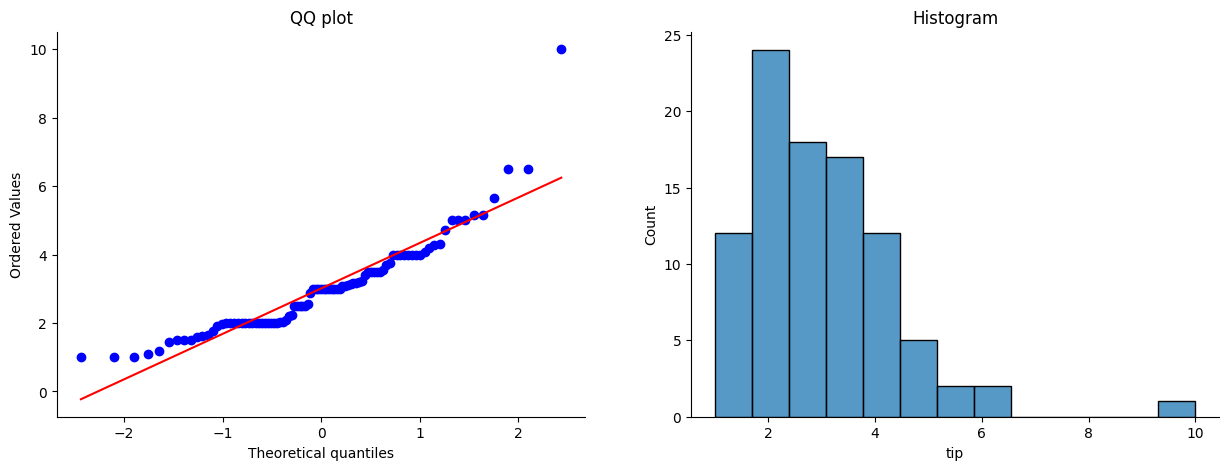

In [47]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import probplot
from scipy.stats import shapiro

np.random.seed(42)
normal_data = smoker_yes['tip']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

plt.show()

## 등분산검정

In [48]:
from scipy import stats

t,p = stats.levene(smoker_yes['tip'], smoker_no['tip'])
t, p

(np.float64(0.02051159105706963), np.float64(0.8862366542563404))

In [49]:
# 0.88이니까 귀무가설 채택 -> 두 집단 분산 같다. -> t-test 할 때  =True로 잡고 하면됨

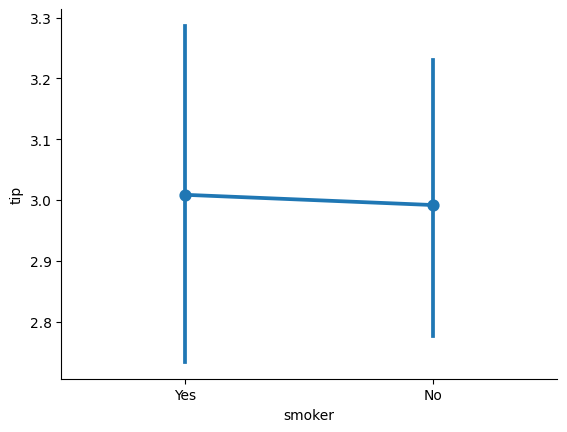

In [50]:
fig, ax = plt.subplots(1, 1)
sns.pointplot(x = 'smoker', y = 'tip', data = tips)
sns.despine()
# 이게 분산이래.. 가운데 점이 평균, 막대가 분산 , yes가 no보다 분산 넓어보임

## t-test

In [51]:
t,p = stats.ttest_ind(smoker_yes['tip'], smoker_no['tip'], equal_var=True)
t, p

(np.float64(0.09222805186888201), np.float64(0.9265931522244976))

In [52]:
# p= np.float64(0.9265931522244976)) -> t-test 결과 : 두 그룹 평균 같댜ㅏ. -> 담배를 피던지 안피던지 팁주는 평균 비슷하다

## 두 그룹 boxplot 시각화

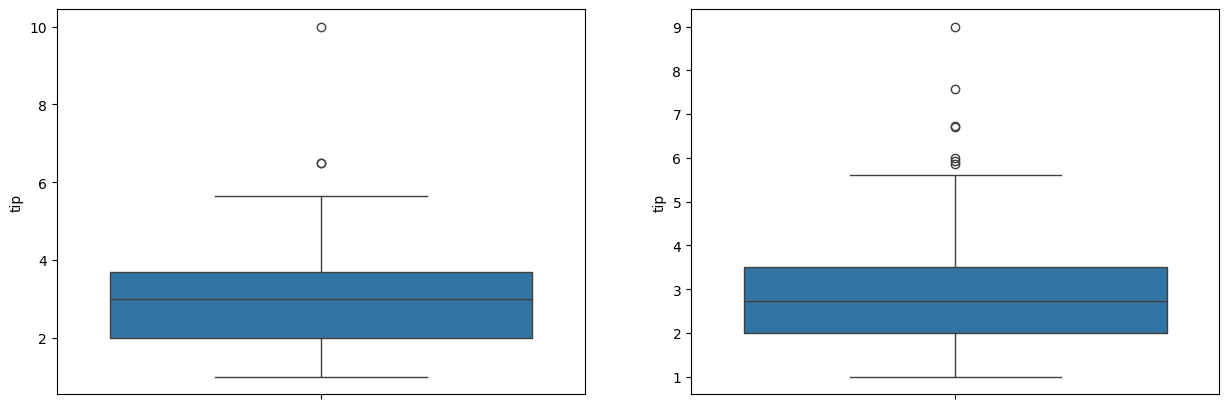

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분리
smoker_yes=tips.loc[tips['smoker']=='Yes',:]
smoker_no=tips.loc[tips['smoker']=='No',:]


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

sns.boxplot(smoker_yes['tip'], ax=ax[0])
sns.boxplot(smoker_no['tip'], ax=ax[1])


plt.show()